# Visualização de Dados com ggplot2

ggplot2 foi desenvolvido para apresentações gráficas de qualidade em segundos. 

Este pacote é baseado em **gramática de gráficos**, a
ideia é que você possa construir qualquer gráfico com alguns poucos componentes básicos: um
conjunto de dados, um conjunto de geoms—
marcações visuais que representam pontos de
dados, e um sistema de coordenadas.

In [3]:
library(tidyverse) # pacote que vamos usar em quase todas as análises de dados

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Esse warning mostra as funções do tidyverse que conflitam com as funções do R base. Se precisar explicitar de onde a função vem, basta usar a notação ```package::function()```:
```R
# exemplo

ggplot2::ggplot()
```

# A gramática de gráficos # VERSÃO TUTORIAL

Esse conceito foi introduzido pelo estatístico Leland Wilkinson, em [Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) (1999). No qual ele permeia sobre os seguintes princípios:

- Gráficos são camadas distintas de elementos gramáticos;
- Plots significativos através do mapeamento da estética;

Pela definição apresentada, existem 7 elementos da gramática de gráficos:

- __Dados__ - o conjunto de dados da visualização;
- __Estética__ - descreve como variáveis são mapeadas em propriedades visuais;
- __Geometrias__ - o formato que os dados assumem nos plots;
- __Facetas__ - plots de pequenos multiplos;
- __Estatísticas__-  representação dos dados para auxiliar o entendimento;
- __Coordenadas__ - o espaço em que os dados são plotados;
- __Temas__ - todo material sem dados;

Desses 7 elementos, 3 deles são essenciais: dados, estética e geometrias, sendos os outros por sua vez, opcionais.



# Entendendo a lógica do ggplot2

Como visto anteriormente, toda visualização com ggplot2 é composta pelos 3 seguintes componentes:

- __Dados__ - o material da visualização.
- __Mapeamento Estético__ (aesthetics mapping) - descreve como as variáveis dos dados são mapeadas para a visualização (i.e., dizer qual variável será representada em qual eixo).
- __Geometria__ (geom) - uma visualização requer pelo menos uma formato para renderizar os dados e a estética na tela. Esses formatos tipicamente tomam a forma de uma função do ggplot2 da classe __geom__ (por exemplo, um gráfico de barras é chamado pela função ```geom_bar()```)

## Códigos base

A primeira função que utilizaremos na construção de um gráfico é a ```ggplot()```.

Ela inicializa um objeto ggplot, que pode ser usado para declarar os **dados** e especificar o **mapeamento estético**.

O mapeamento estético, apresentado acima, é feito com a função ```aes()```.

```R
# inicializando o objeto ggplot
ggplot(data = mpg, mapping = aes(x = variavel1, y = variavel2))
```

Se você tentar executar o código acima, verá que nada é plotado em tela, isso acontece porque não definimos o terceiro componente, as camadas (layers).

Para isso, utilizamos o que é chamado de funções **geom**, ela vai definir a forma de como a informação aparece em tela, por exemplo, se quisermos fazer um gráfico de barras aplicamos ```geom_bar()```, um gráfico de dispersão aplicamos ```geom_points()```, etc. 

Todas as funções **geom** podem ser encontradas na [referência do ggplot2](https://ggplot2.tidyverse.org/reference/#section-layer-geoms).

Mas como relacionamos o componente **geom** com o objeto **ggplot**? Isso se dá simplesmente por uma soma.

```R
# inicializando o objeto ggplot
ggplot(data = mpg, mapping = aes(x = variavel1, y = variavel2)) +
  geom_point()
```

**Observação 1**: atente-se ao local de onde foi inserido o sinal '+', a simples alteração desse sinal para a linha do geom, já deixaria o código não executável, ou seja, apresentaria um erro.

**Observação 2**: algumas funções geom aceitam o parâmetro de mapeamento estético (mapping), isso pode facilitar a construção de alguns gráficos.

**Observação 3**: as variáveis escolhidas para o mapeamento estético ```aes()``` devem ser escolhidas adequadamente ao tipo de gráfico, por exemplo, um gráfico de barras exige somente uma variável (do tipo categórica)

## O CheatSheet do ggplot2

Com tantas possibilidades de gráficos, é sempre bom ter uma colinha pra saber o que usar, concorda? 

Felizmente, os desenvolvedores do [RStudio](rstudio.com) disponilizam um no site deles, você pode acessá-lo clicando [aqui](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf).

# ggplot2 na prática

Para realizarmos alguns exemplos práticos é necessário um dataset, para este tutorial escolhemos a base **mpg**.

## A base de dados mpg

Esses dados dizem respeito a um conjunto de automóveis, por meio das seguintes variáveis:

- **manufacturer**: nome do fabricante
- **model**: nome do modelo
- **displ**: deslocamento do motor, em litros
- **year**: ano de fabricação
- **cyl**: número de cilindros
- **trans**: tipo de transmissão
- **drv**: o tipo de trem de tração, em que f = tração dianteira, r = tração traseira, 4 = 4x4
- **cty**: milhas da cidade por galão
- **hwy**: milhas rodoviárias por galão
- **fl**: tipo de combustível
- **class**: tipo de carro

In [0]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## Boas Práticas de Visualização de Dados

Cores, Títulos, Nome dos Eixos e Unidades dos Eixos.

Os quatro itens acima são extremamente importantes para leitura/interpretação de gráficos.

O primeiro pode ser aplicado por meio do parâmetro **fill** de alguns geoms, ele altera a cor do preenchimento dos gráficos. Exemplo:
```R
ggplot(data = mtcars, mapping = aes(factor(cyl))) + 
  geom_bar(fill = "red")
```
Existem outros métodos, que podem ser encontrados [aqui](https://ggplot2.tidyverse.org/reference/aes_colour_fill_alpha.html).

Os três ultimos podem ser implementados por meio da função ```labs()```, atribuindo os textos aos parâmetros **x**, **y** e **title**, ou também por meio das funções ```xlab()```, ```ylab()``` e ```ggtitle()```. Em caso de dúvidas veja a [referência](https://ggplot2.tidyverse.org/reference/labs.html).

# Gráficos univariáveis


## Histograma

É um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída. Esse gráfico pode ser utilizado tanto para variáveis contínuas e discretas.

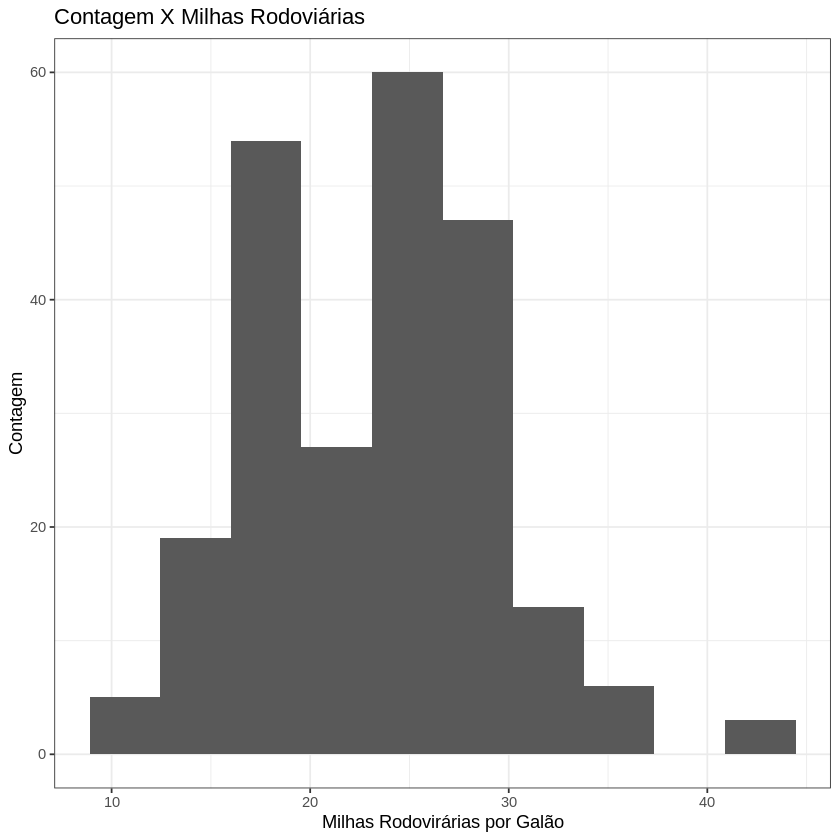

In [0]:
ggplot(data = mpg, mapping = aes(x = hwy)) + 
  geom_histogram(bins = 10) +
  theme_bw() +
  labs(y = "Contagem", x = "Milhas Rodovirárias por Galão",
    title = "Contagem X Milhas Rodoviárias")


## Densidade de probabilidade
Além do histograma, temos também o gráfico da densidade de uma feature. Esse gráfico é uma versão “suavizada” do histograma. Note que o eixo y mostra uma estimativa da frequência relativa de cada valor. Em termos probabilísticos, trata-se de uma estimativa da função densidade de probabilidade da feature.

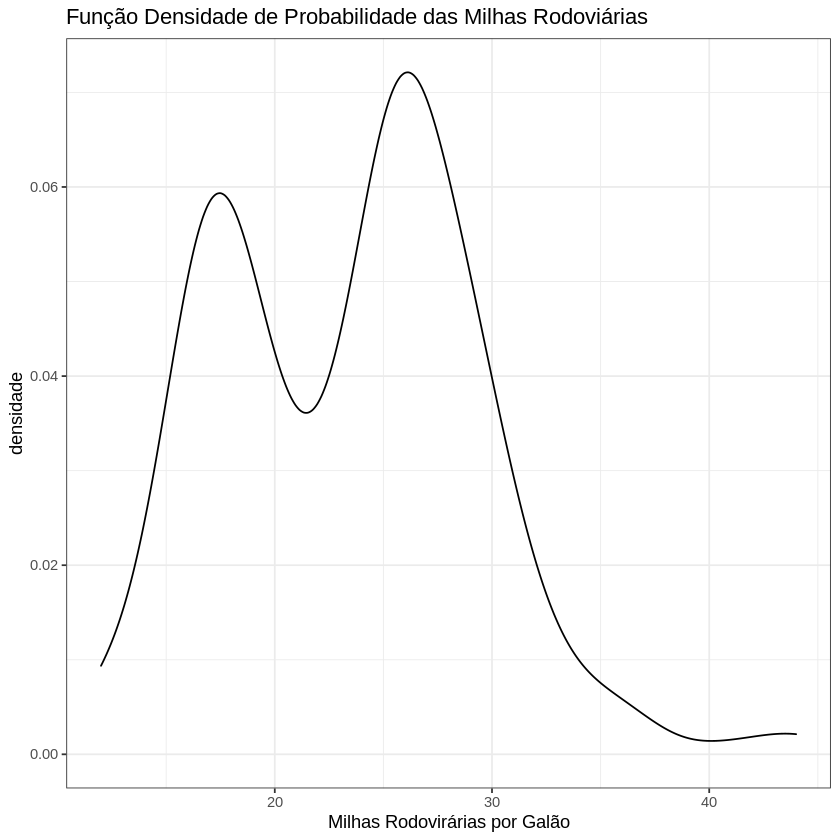

In [8]:
ggplot(data = mpg, mapping = aes(x = hwy)) + 
  geom_density() +
  theme_bw() +
  labs(y = "densidade", x = "Milhas Rodovirárias por Galão",
    title = "Função Densidade de Probabilidade das Milhas Rodoviárias")

## Dados categóricos
Um caso especial da contagem de dados é quando a variável é categórica, ou seja, ela assume um número limitado de valores possíveis. Para o caso unidimensional, geralmente se deseja analisar o número de observações em cada categoria. Neste casos estamos construindo o gráfico do número de carros de cada marca.




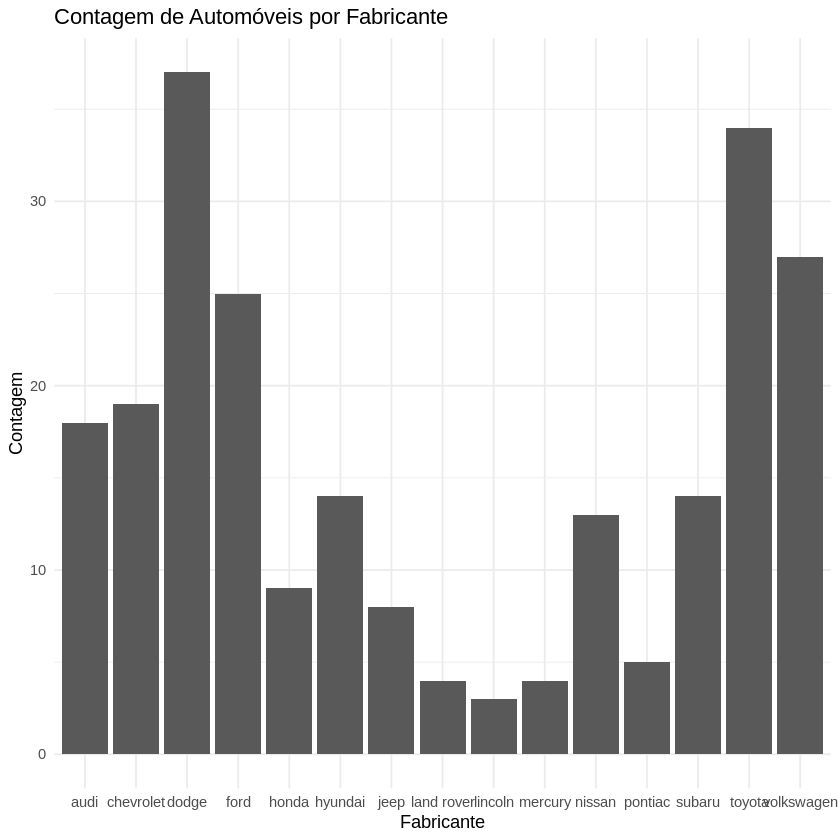

In [9]:
ggplot(data = mpg, aes(x = manufacturer)) +
  geom_bar() +
  theme_minimal() +
  labs(y = "Contagem", x = "Fabricante",
    title = "Contagem de Automóveis por Fabricante")

# Gráficos com Duas Variáveis

## Gráfico de Dispersão

Nos gráficos de dispersão, os pontos representam o valor das observações em duas variáveis, uma medida ao longo do eixo x e a outra ao longo do eixo y. Podemos usar um geom_point para ver como duas features numéricas estão relacionadas. 

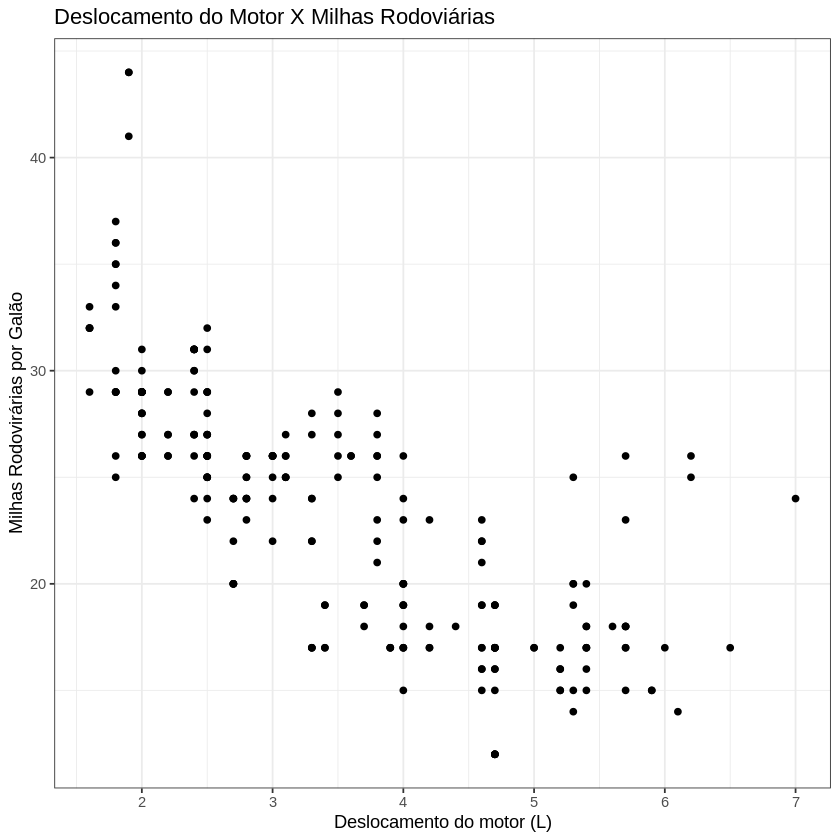

In [4]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  theme_bw() +
  labs(x = "Deslocamento do motor (L)", y = "Milhas Rodovirárias por Galão",
    title = "Deslocamento do Motor X Milhas Rodoviárias")

## Boxplot

Um boxplot é um diagrama das features de um dataset. Essa representação gráfica guarda 5 informações principais sobre a distribuição dos dados, são elas:
- Mediana
- Primeiro quartil (Q1)
- Terceiro quartil (Q3)
- Limite inferior: Q1–1.5*(Q3-Q1)
- Limite superior: Q3 + 1.5*(Q3-Q1)

![alt text](https://miro.medium.com/max/1400/0*qfXpyiwlFdsj3eMG)

No boxplot temos 3 quartis, que dividem o dataset em 4 regiões: o primeiro quartil (Q1) representa o número tal que abaixo dele estejam 25% dos dados, e por conseguinte o segundo quartil (Q2) indica o valor de forma que abaixo dele estejam 50% dos dados o que é equivalente à mediana, e por fim, o terceiro quartil (Q3) está acima de 75% dos dados.
Os outliers indicam possivelmente erros nos dados (dados discrepantes), uma vez que dista mais que os limites do intervalo esperado, e portanto, podem ser desconsiderados.


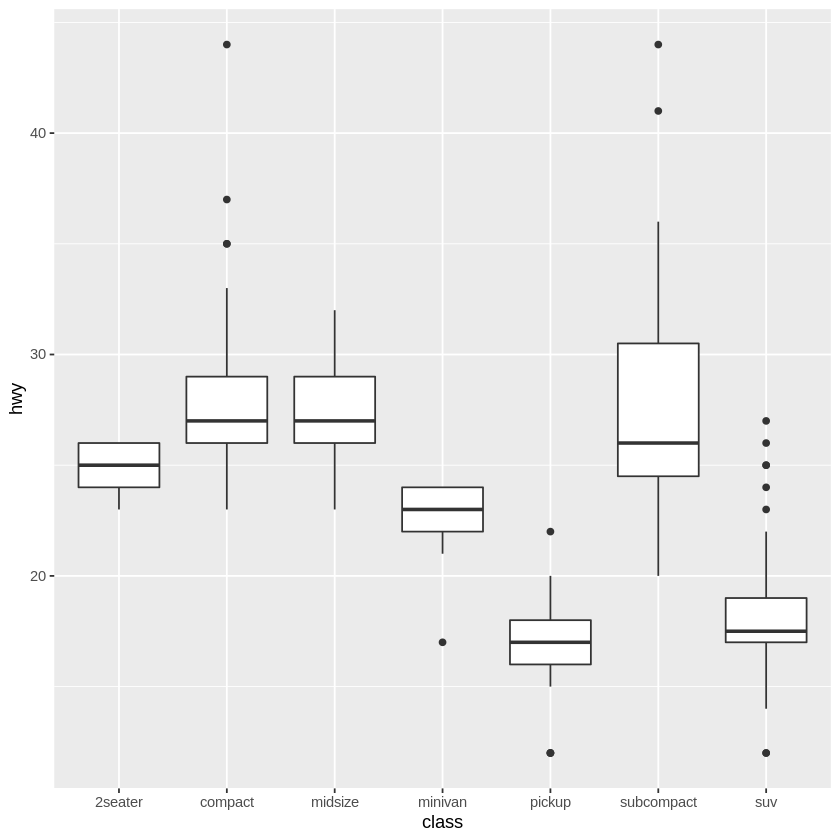

In [0]:
ggplot(data = mpg) + 
  geom_boxplot(mapping = aes(class, hwy))

## Violinplot

Esses gráficos juntam o boxplot com uma curva de densidade dos dados. O nome do gráfico (violinplot) vem do formato dos plots gerados, como podemos ver abaixo:

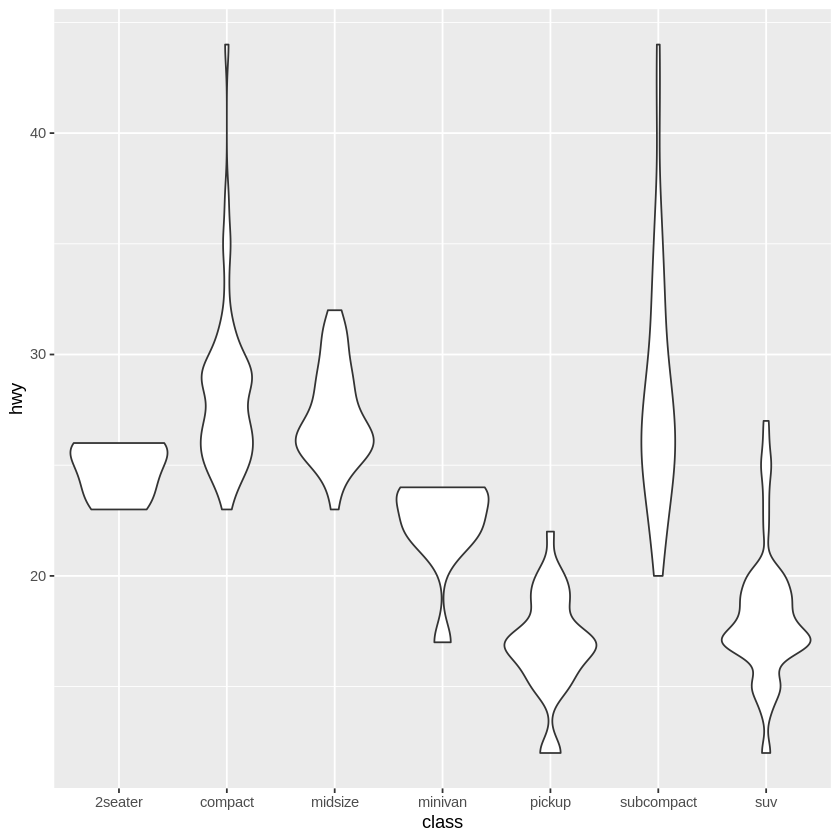

In [0]:
ggplot(data = mpg) + 
    geom_violin(mapping = aes(class, hwy))

# Transformação de gráficos a partir de suas estatisticas


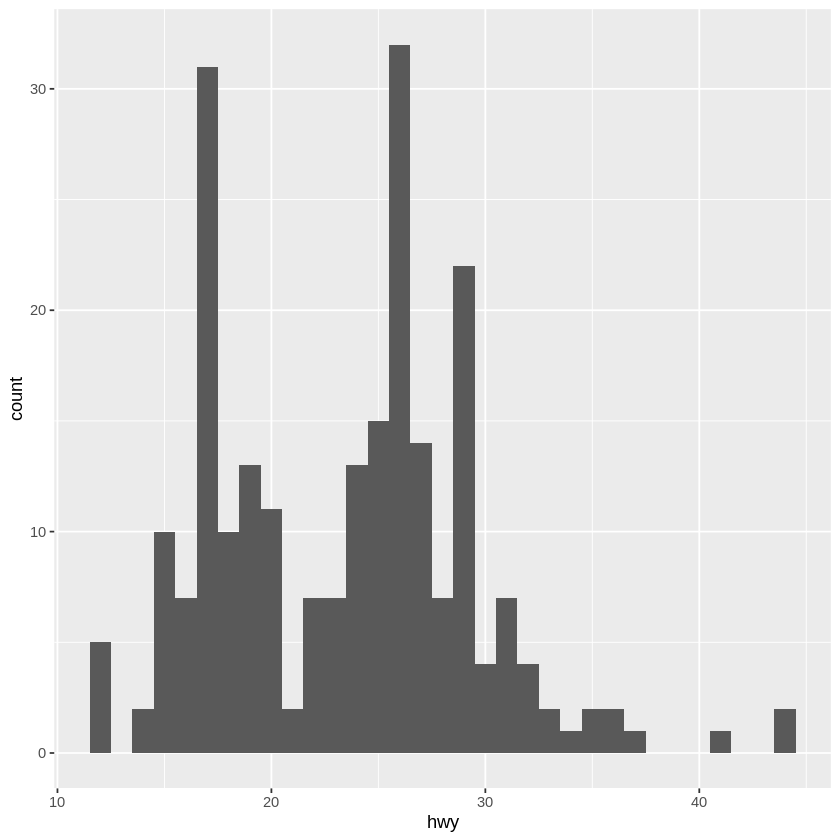

In [0]:
ggplot(data = mpg, mapping = aes(hwy)) + stat_count(width = 1)

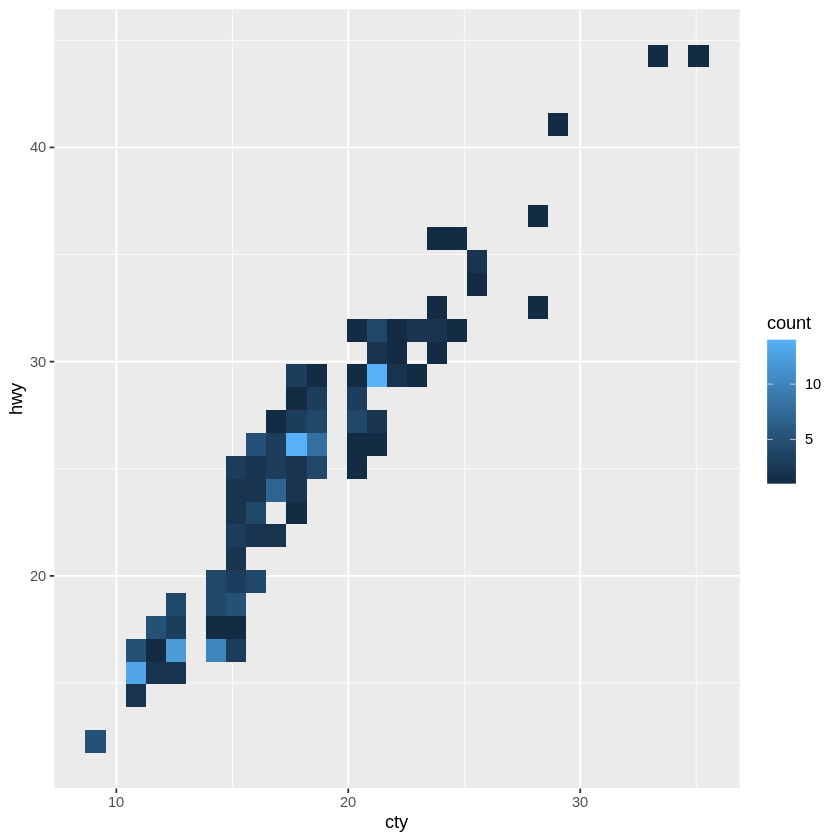

In [0]:
ggplot(mpg, aes(cty, hwy)) + stat_bin_2d(bins = 30)

Warning message:
“Ignoring unknown parameters: countour”


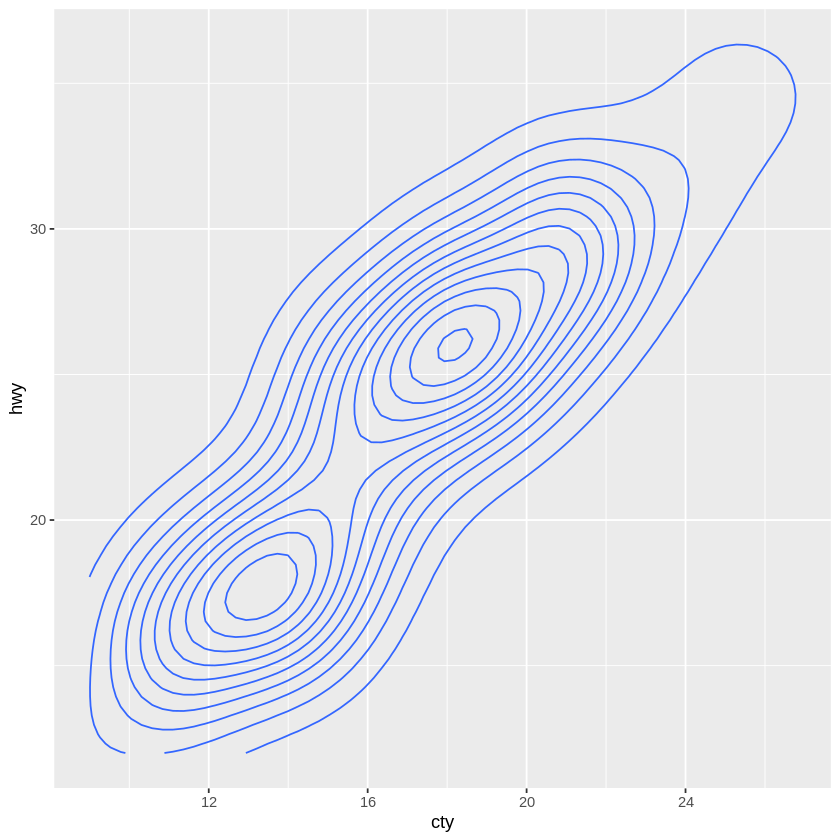

In [0]:
ggplot(mpg, aes(cty, hwy)) + stat_density_2d(countour = TRUE, n = 100)

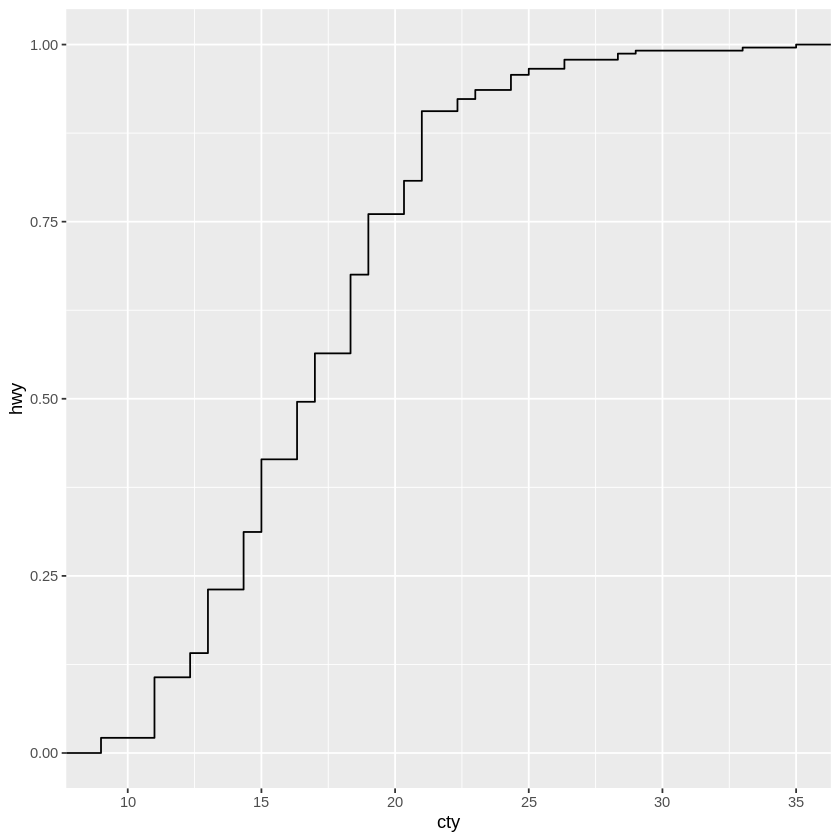

In [0]:
# Função de distribuição acumulada
ggplot(mpg, aes(cty, hwy)) + stat_ecdf(n = 40)

# Ajustes

## Cores


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



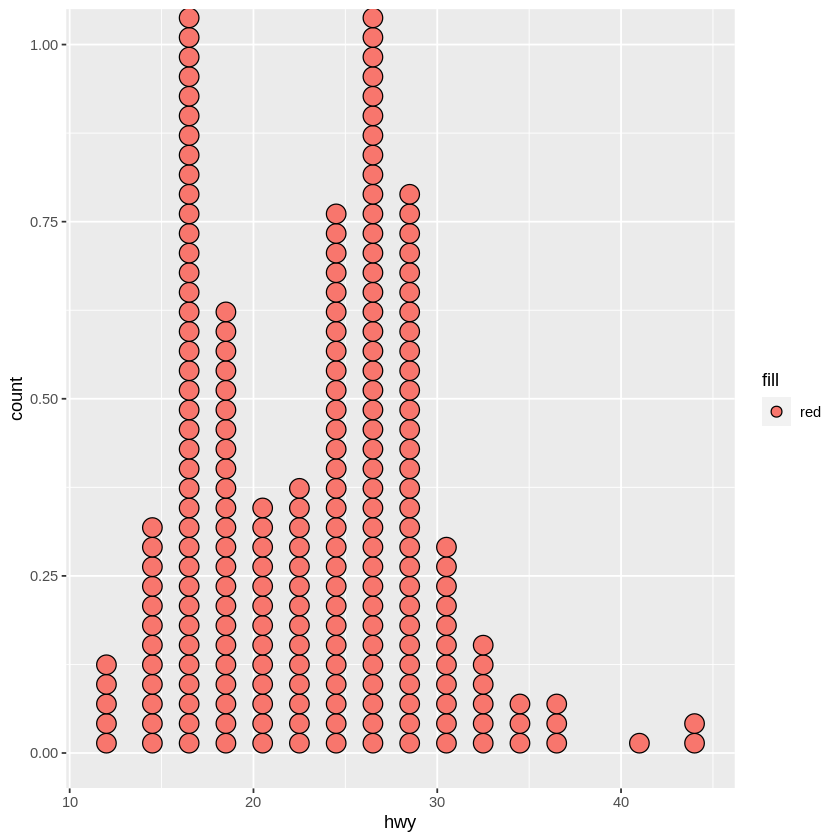

In [0]:
hwy_map + geom_dotplot(mapping = aes(fill = "red"))

## Temas


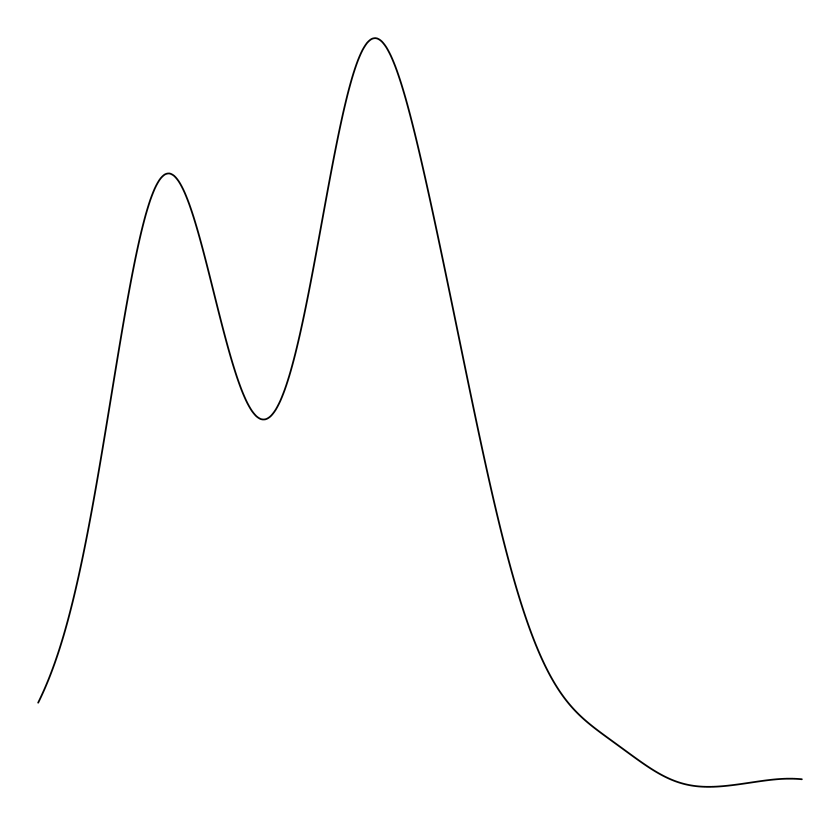

In [0]:
grafico_densidade + theme_void()

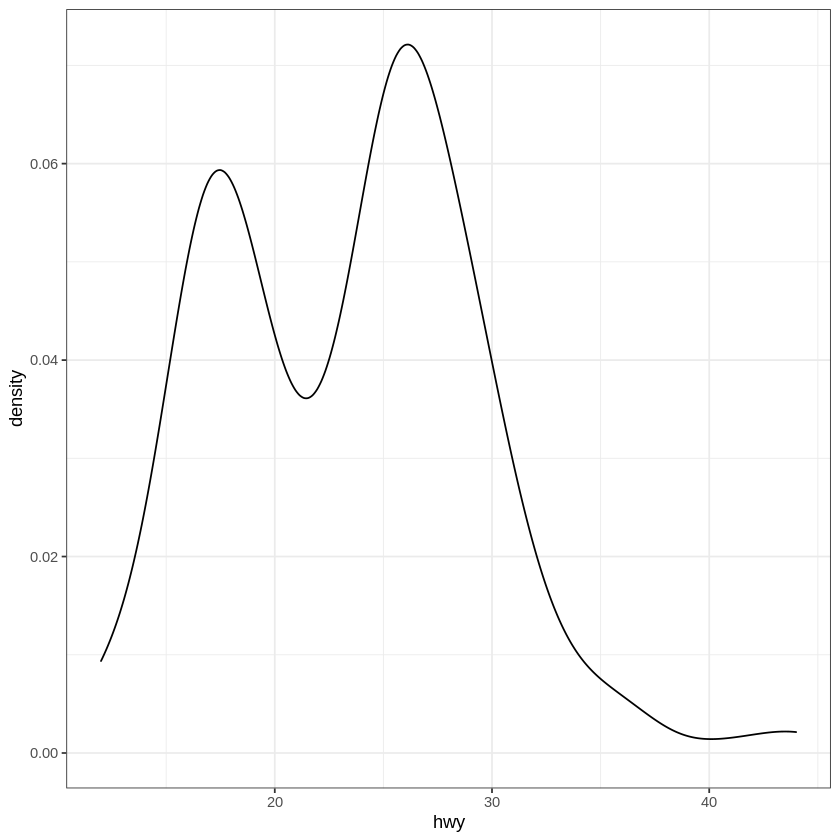

In [0]:
grafico_densidade + theme_bw()

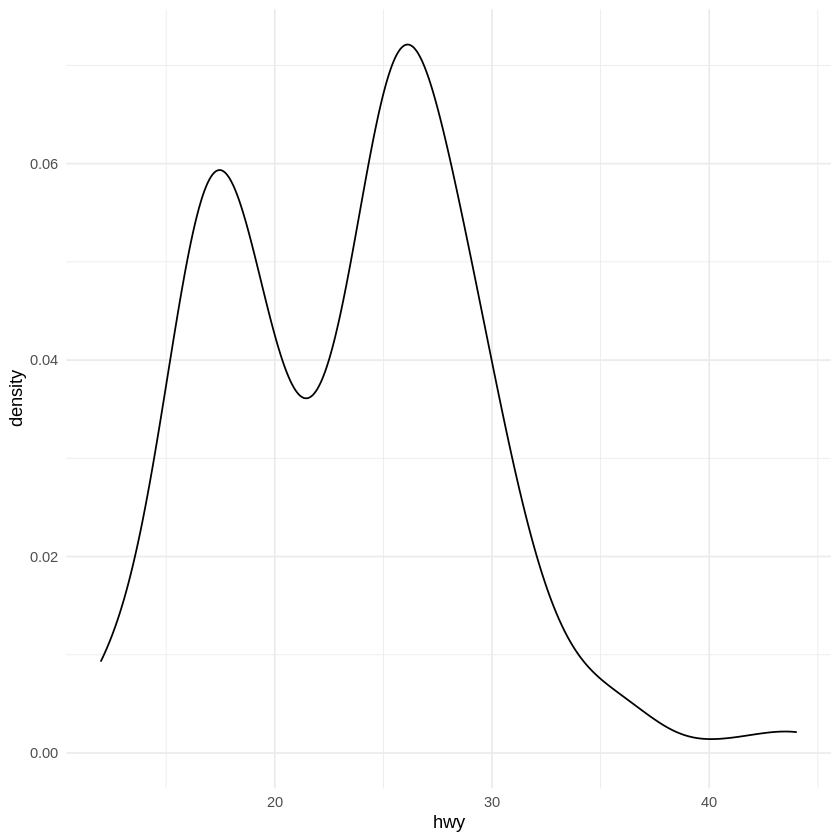

In [0]:
grafico_densidade + theme_minimal()

## Ajuste de Curvas


`geom_smooth()` using formula 'y ~ x'



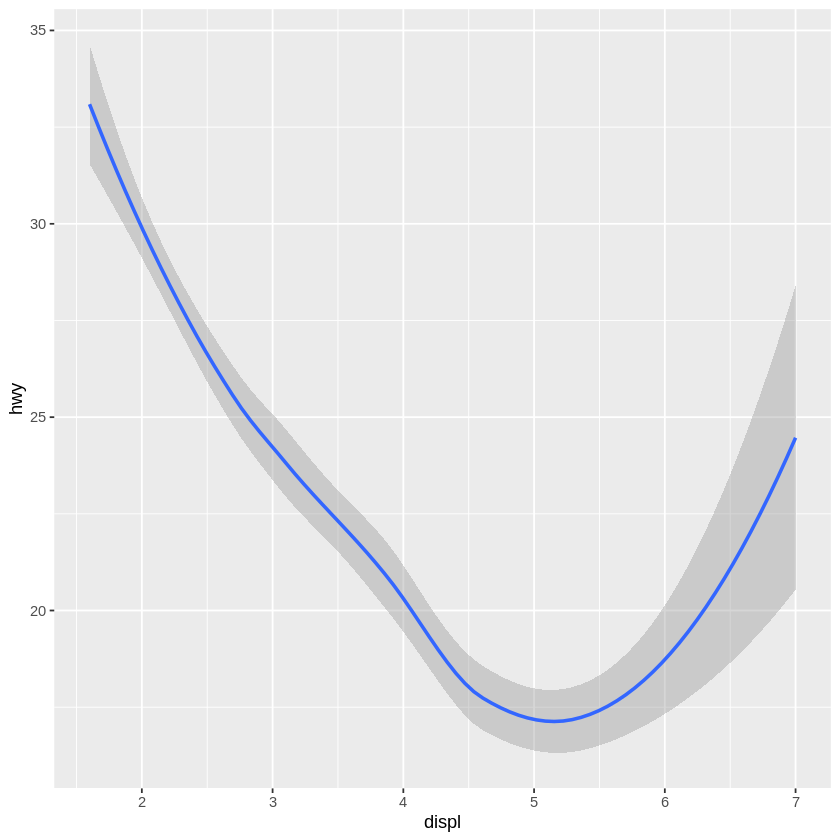

In [10]:
# ajuste de curva com método loess
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy), method = 'loess')

`geom_smooth()` using formula 'y ~ x'



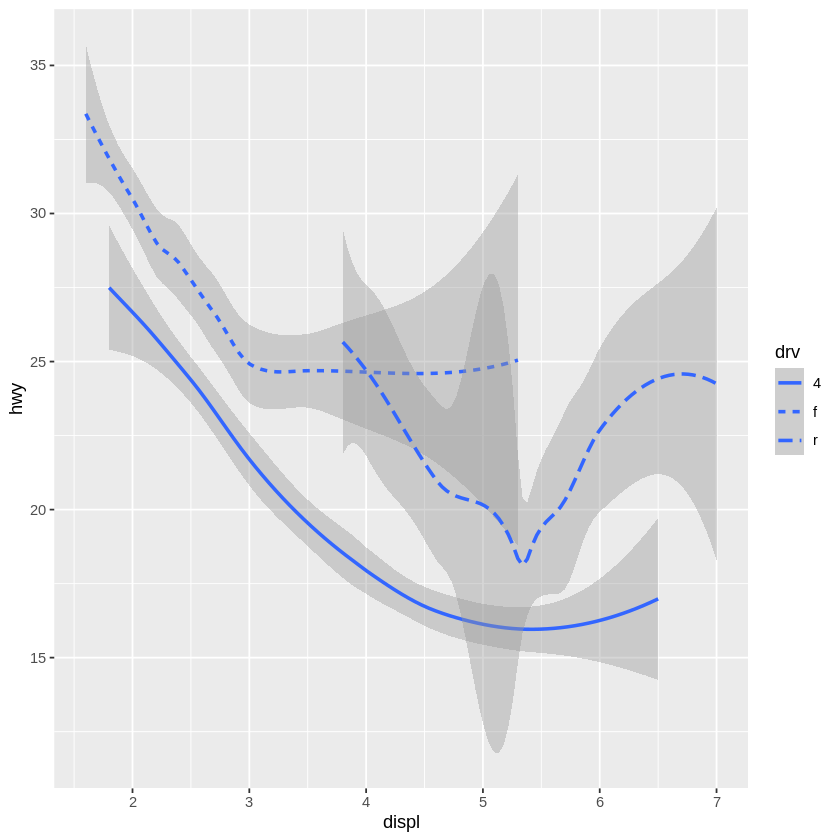

In [11]:
# ajuste de curva por categoria usando linetype = dvr
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv), method = 'loess')

`geom_smooth()` using formula 'y ~ x'



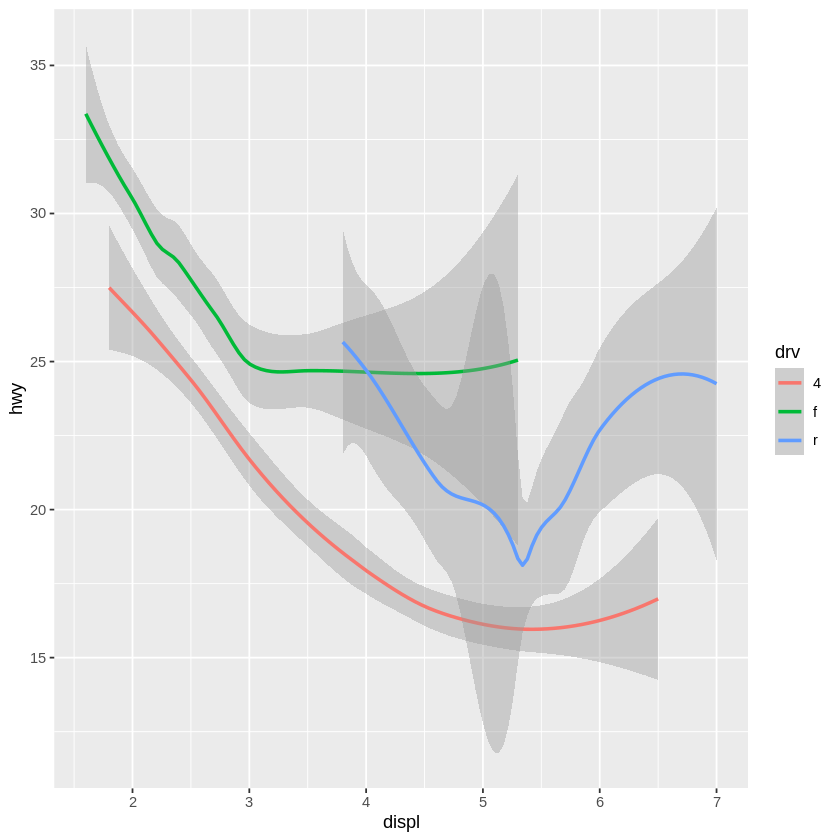

In [12]:
# ajuste de curva por categoria usando linetype = dvr
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, color = drv), method = 'loess')

`geom_smooth()` using formula 'y ~ x'



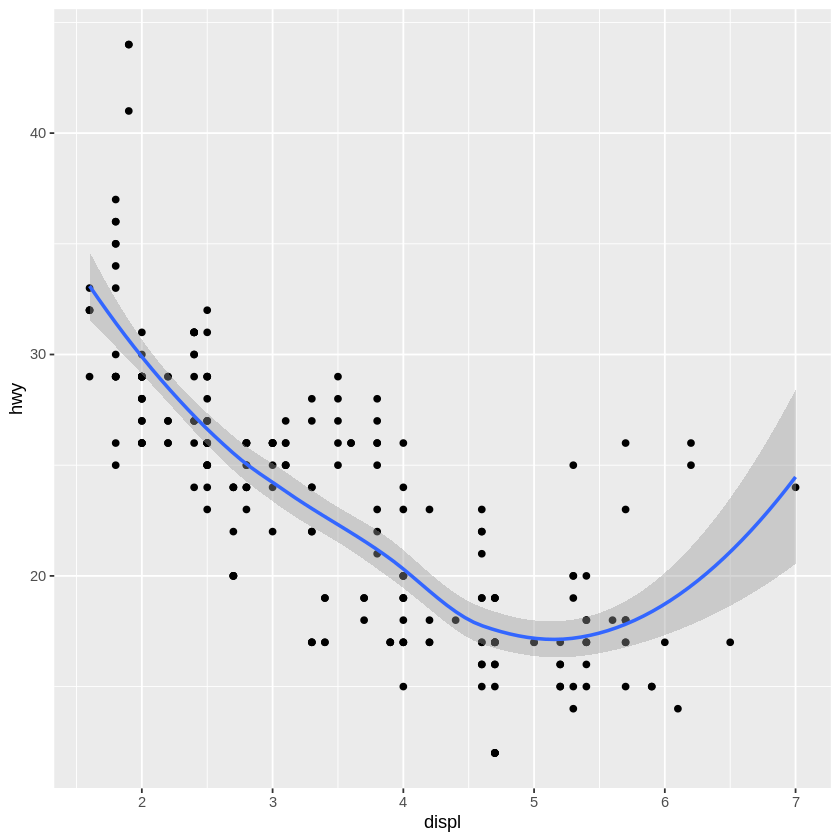

In [13]:
ggplot(data = mpg) +
 geom_point(mapping = aes(x = displ, y = hwy)) +
 geom_smooth(mapping = aes(x = displ, y = hwy), method = 'loess')

`geom_smooth()` using formula 'y ~ x'



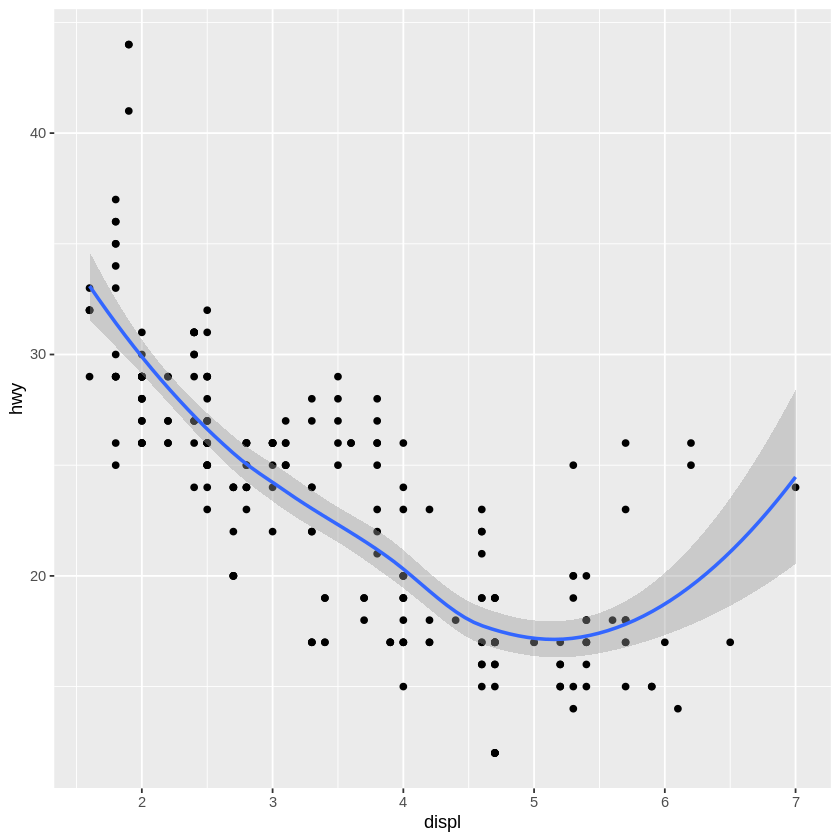

In [14]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
 geom_point() +
 geom_smooth(method = 'loess')

# Informações Auxiliares

## Temas

Em alguns do exemplos acima, apresentamos como alterar o tema do gráfico, [na documentação do ggplot2](https://ggplot2.tidyverse.org/reference/ggtheme.html) é possível encontrar todos os temas disponíveis.

## Vizualizações por classes



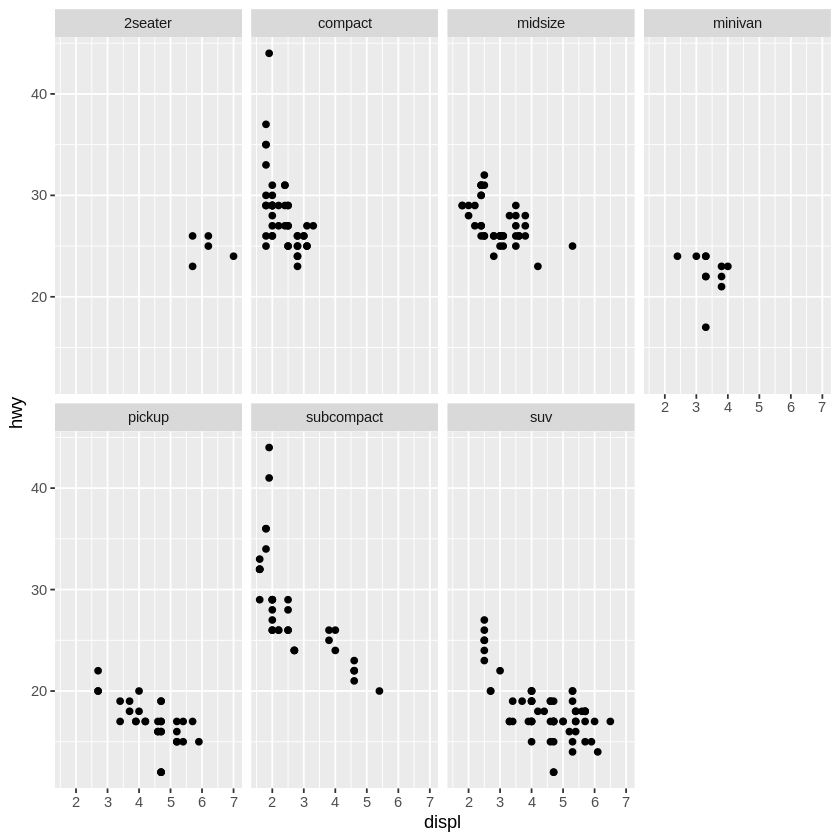

In [0]:
ggplot(data = mpg) +
 geom_point(mapping = aes(x = displ, y = hwy)) +
 facet_wrap(~class, nrow = 2)